In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
%matplotlib inline

from Subset_Model import RGCCA

In [2]:
data_dir = "/home/ng255707/Documents/Parsimony/Glioma_Data/CV/"

# Exp 1: Config 1_2_2_Fista:

## Meilleur résultat

Sur le jeu de donnée réduites (4341 gènes en GE présents dans les pathways Kegg, 1229 segments CGH), recherche de paramètres par 5-fold RandomSearchCV. Le modèle CCA à 3 blocs (hiérarchique) est contraint par:
- Sur le bloc GE:
    - Contrainte L1 (param_l1)
    - Contrainte RGCCA (tau = 1 par SS)
- Sur le bloc CGH:
    - Contrainte L1 (param_l2)
    - Contrainte RGCCA (tau = 1)
- Sur le bloc Y: Contrainte RGCCA tau = 1

Les données sont standardisée et divisé par racine de 1/n_features avant la CCA. Le modèle est évalué avec le score de classification de la localisation par une LDA. Le script pour cette expérience est Subset_Model.py

In [48]:
results = pd.read_csv(data_dir + 'config_1_2_2_Fista.csv').drop('Unnamed: 0',axis=1)
best_mod = np.load(data_dir + 'best_estimator_config_1_2_2_Fista.npy').item().steps[1][1]

In [49]:
p = results.mean_test_score.max()
results.loc[results.mean_test_score == p].drop('params',axis=1).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_rgcca__l1,param_rgcca__l2,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
25,2.835002,0.003577,0.811321,0.929236,782.833283,144.942539,1,0.909091,0.928571,0.909091,...,0.727273,0.952381,0.7,0.930233,0.8,0.930233,0.795614,0.000942,0.088297,0.01508


In [50]:
results.mean_fit_time.mean()

6.016632079184055

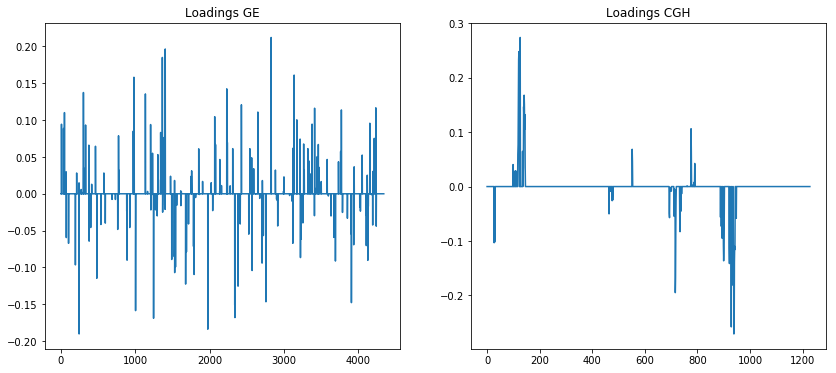

In [51]:
w = best_mod.w
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.plot(w[0])
plt.title('Loadings GE')
plt.subplot(122)
plt.plot(w[1])
plt.title('Loadings CGH');

Number of significant contributions: (153,)
Number of significant contributions: (70,)


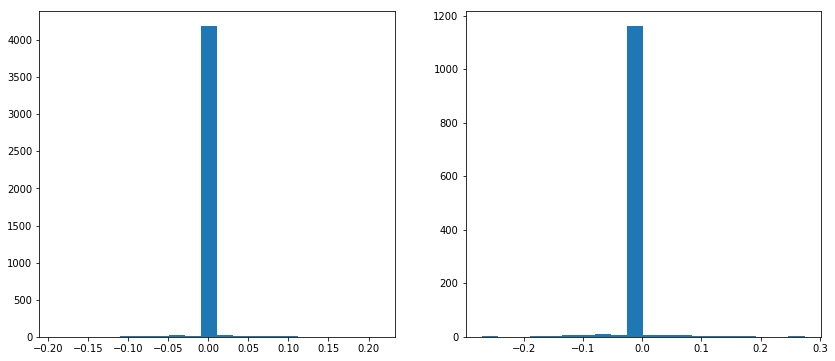

In [52]:
plt.figure(figsize=(14,6))
plt.subplot(121)
print 'Number of significant contributions: {}'.format(np.where(abs(w[0]) > 1e-2)[0].shape)
plt.hist(w[0],bins=20);
print 'Number of significant contributions: {}'.format(np.where(abs(w[1]) > 1e-2)[0].shape)
plt.subplot(122)
plt.hist(w[1],bins=20);

In [53]:
best_mod.info['converged']

True

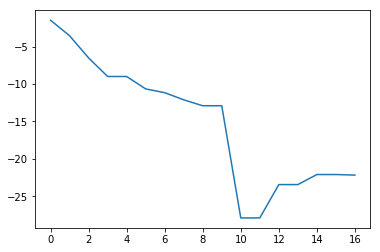

In [56]:
plt.plot(np.array(best_mod.info['func_val']).flatten());

In [57]:
best_mod.info['num_iter']

[8, 8, 4]

In [129]:
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

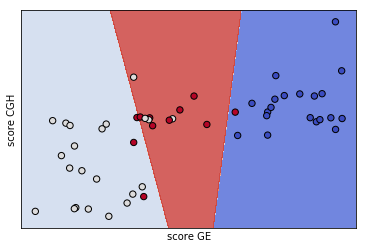

In [130]:
xx, yy = make_meshgrid(best_mod.t1, best_mod.t2)
fig, sub = plt.subplots(1, 1)
ax = sub
clf = best_mod.lda
plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(best_mod.t1.flatten(),best_mod.t2.flatten(), c=best_mod.labels, cmap=plt.cm.coolwarm, s=40, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('score GE')
ax.set_ylabel('score CGH')
ax.set_xticks(())
ax.set_yticks(())

plt.show()

# Exp 2: Config 2_2_2_Conesta

Sur le jeu de donnée réduites (15702 gènes en GE présents dans les pathways Kegg, 1229 segments CGH), recherche de paramètres par 5-fold RandomSearchCV. Le modèle CCA à 3 blocs (hiérarchique) est contraint par:
- Sur le bloc GE:
    - Contrainte L1 (param_l1)
    - Contrainte RGCCA (tau = 1 par SS)
    - GraphTV (param_g1)
- Sur le bloc CGH:
    - Contrainte L1 (param_l2)
    - Contrainte RGCCA (tau = 1)
- Sur le bloc Y: Contrainte RGCCA tau = 1

Les données sont standardisée et divisé par racine de 1/n_features avant la CCA. Le modèle est évalué avec le score de classification de la localisation par une LDA. Le script pour cette expérience est Subset_Model.py

In [60]:
results = pd.read_csv(data_dir + 'config_2_2_2_Conesta.csv').drop('Unnamed: 0',axis=1)
best_mod = np.load(data_dir + 'best_estimator_config_2_2_2_Conesta.npy').item().steps[1][1]

In [61]:
p = results.mean_test_score.max()
results.loc[results.mean_test_score == p].drop('params',axis=1).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_rgcca__g1,param_rgcca__l1,param_rgcca__l2,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
32,128.349489,0.002750,0.792453,0.915282,-4,270.107171,245.689957,1,0.909091,0.904762,...,0.727273,0.97619,0.7,0.883721,0.8,0.906977,7.291336,0.000671,0.073934,0.031611
51,123.691131,0.003030,0.792453,0.910520,-6,326.757086,245.350416,1,0.909091,0.880952,...,0.727273,0.97619,0.7,0.883721,0.8,0.906977,3.325614,0.000750,0.073934,0.034499
99,124.946243,0.002509,0.792453,0.910631,-5,228.823992,247.909407,1,0.909091,0.904762,...,0.727273,0.97619,0.7,0.883721,0.8,0.883721,6.228553,0.000411,0.073934,0.034103


In [62]:
results.mean_fit_time.mean()

123.85262355870671

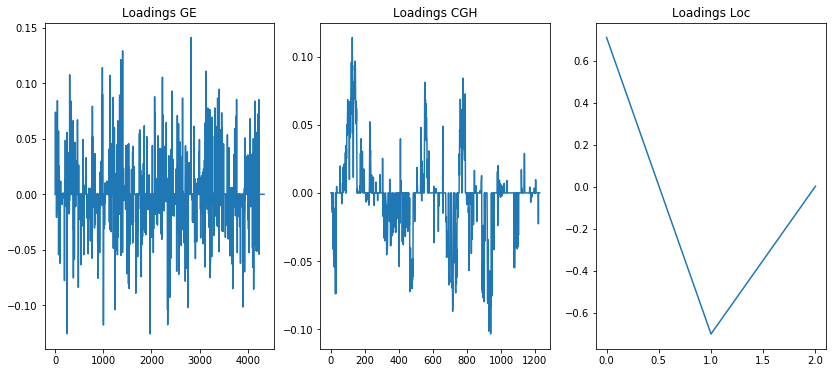

In [63]:
w = best_mod.w
plt.figure(figsize=(14,6))
plt.subplot(131)
plt.plot(w[0])
plt.title('Loadings GE')
plt.subplot(132)
plt.plot(w[1])
plt.title('Loadings CGH');
plt.subplot(133)
plt.plot(w[2])
plt.title('Loadings Loc');

Number of significant contributions: (439,)
Number of significant contributions: (430,)


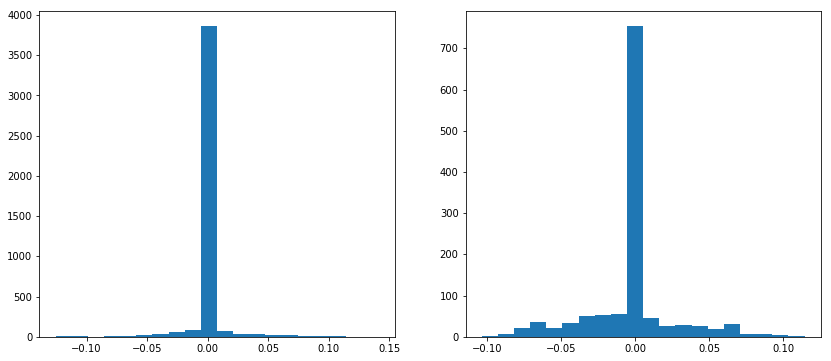

In [64]:
plt.figure(figsize=(14,6))
plt.subplot(121)
print 'Number of significant contributions: {}'.format(np.where(abs(w[0]) > 1e-2)[0].shape)
plt.hist(w[0],bins=20);
print 'Number of significant contributions: {}'.format(np.where(abs(w[1]) > 1e-2)[0].shape)
plt.subplot(122)
plt.hist(w[1],bins=20);

In [52]:
best_mod.info['converged']

True

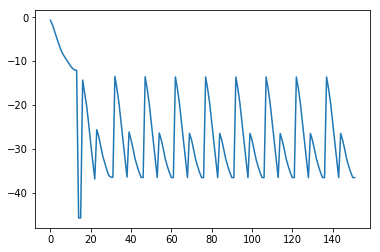

In [66]:
plt.plot(best_mod.info['fvalue']);

In [15]:
prob = []
with open(data_dir + 'log.txt','r') as log:
    l = log.readlines()
    l = l[0].split('{')
    for dic in l[1:-9]:
        dic = '{' + dic
        prob.append(json.loads(dic))

In [17]:
iter0 = []
for exp in prob:
    iter0.append(exp['num_iter'][0])
iter0 = pd.Series(iter0)

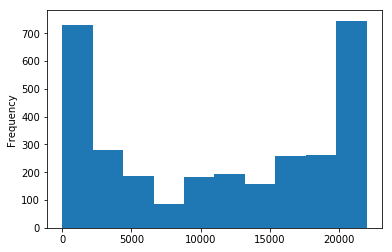

In [18]:
iter0.plot.hist();

In [22]:
prob[-198]['num_iter']

[14138, 17, 13]